<a href="https://colab.research.google.com/github/MmayankSharma987/Python-for-Data-Science/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1) Loading data

In [71]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [72]:
path = '/content/Melbourne_Housing.csv' # loading and reading data
df= pd.read_csv(path)
df.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
0,Airport West,3,t,Nelson,03-09-2016,13.500,3042.000,3.000,2.000,1.000,303.000,225,2016.000,Western Metropolitan,3464,840000
1,Albert Park,2,h,hockingstuart,03-09-2016,3.300,3206.000,2.000,1.000,0.000,120.000,82,1900.000,Southern Metropolitan,3280,1275000
2,Albert Park,2,h,Thomson,03-09-2016,3.300,3206.000,2.000,1.000,0.000,159.000,inf,NaN,Southern Metropolitan,3280,1455000
3,Alphington,4,h,Brace,03-09-2016,6.400,3078.000,3.000,2.000,4.000,853.000,263,1930.000,Northern Metropolitan,2211,2000000
4,Alphington,3,h,Jellis,03-09-2016,6.400,3078.000,3.000,2.000,2.000,208.000,inf,2013.000,Northern Metropolitan,2211,1110000


#2) Sanity Checks

In [73]:
pd.set_option('display.float_format',lambda x:'%.3f' % x) # to restrict float value to display upto 3 decimals.

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27114 non-null  object 
 1   Rooms          27114 non-null  int64  
 2   Type           27114 non-null  object 
 3   SellerG        27114 non-null  object 
 4   Date           27114 non-null  object 
 5   Distance       27113 non-null  float64
 6   Postcode       27113 non-null  float64
 7   Bedroom        20678 non-null  float64
 8   Bathroom       20672 non-null  float64
 9   Car            20297 non-null  float64
 10  Landsize       17873 non-null  float64
 11  BuildingArea   10543 non-null  object 
 12  YearBuilt      11985 non-null  float64
 13  Regionname     27114 non-null  object 
 14  Propertycount  27114 non-null  int64  
 15  Price          27114 non-null  int64  
dtypes: float64(7), int64(3), object(6)
memory usage: 3.3+ MB


In [75]:
print('There are',df.shape[0],'rows and',df.shape[1],'columns in this data.')

There are 27114 rows and 16 columns in this data.


#####There are 10 numerical column and 6 object type columns as per info() function but upon reviewing data closely, we came to know few corrections-
##### 1. Date column is read as object type column but it should be data time format
##### 2.BuildingArea is read as object type but it should be numerical data type.

In [76]:
# changing data time format
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27114 non-null  object        
 1   Rooms          27114 non-null  int64         
 2   Type           27114 non-null  object        
 3   SellerG        27114 non-null  object        
 4   Date           27114 non-null  datetime64[ns]
 5   Distance       27113 non-null  float64       
 6   Postcode       27113 non-null  float64       
 7   Bedroom        20678 non-null  float64       
 8   Bathroom       20672 non-null  float64       
 9   Car            20297 non-null  float64       
 10  Landsize       17873 non-null  float64       
 11  BuildingArea   10543 non-null  object        
 12  YearBuilt      11985 non-null  float64       
 13  Regionname     27114 non-null  object        
 14  Propertycount  27114 non-null  int64         
 15  Price          2711

In [77]:
# why the BuildingArea is read as object type, we need to know the unique values
df['BuildingArea'].unique()
# here there are lots of 'inf' and 'missing values', we can consider 'nan' (not any number) to be the default for missing values and inf (any number) because we dont know the exact value in 'missing' and 'inf'.

array(['225', '82', 'inf', '263', '242', '251', '117', 'missing', '76',
       '399', '118', '103', '180', '123', '218', '129', '167', '154',
       '275', '121', nan, '125', '255', '75', '156', '240', '268', '108',
       '69', '140', '214', '253', '189', '215', '96', '104', '100', '313',
       '144', '93', '110', '70', '122', '51', '147', '113', '83', '56',
       '137', '85', '64', '175', '3558', '170', '265', '353', '138', '19',
       '116', '87', '74', '320', '300', '210', '120', '86', '97', '200',
       '106', '14', '161', '128', '185', '146', '133', '115', '143',
       '150', '195', '236', '276', '188', '179', '249', '141', '34', '73',
       '107', '84', '81', '207', '50', '264', '312', '235', '221', '183',
       '132', '160', '186', '78', '105', '145', '62', '220', '315', '181',
       '61', '112', '420', '226', '266', '410', '449', '356', '477',
       '250', '95', '190', '284', '247', '213', '209', '119', '111',
       '130', '348', '166', '44', '176', '98', '159', '79'

In [78]:
df['BuildingArea'].apply(type).value_counts() # this will give us how many different types of data are there, eg- in this case how many are float and string values.
# we have 16571 are float and 10543 str or missing values (less than 50 % data).

,count
BuildingArea,
<class 'float'>,16571
<class 'str'>,10543


In [79]:
# Replacing inf and missing values with nan.
df['BuildingArea']=df['BuildingArea'].replace(['missing','inf'],np.nan)

# Changing the data type to float.
df['BuildingArea']= df['BuildingArea'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27114 non-null  object        
 1   Rooms          27114 non-null  int64         
 2   Type           27114 non-null  object        
 3   SellerG        27114 non-null  object        
 4   Date           27114 non-null  datetime64[ns]
 5   Distance       27113 non-null  float64       
 6   Postcode       27113 non-null  float64       
 7   Bedroom        20678 non-null  float64       
 8   Bathroom       20672 non-null  float64       
 9   Car            20297 non-null  float64       
 10  Landsize       17873 non-null  float64       
 11  BuildingArea   10529 non-null  float64       
 12  YearBuilt      11985 non-null  float64       
 13  Regionname     27114 non-null  object        
 14  Propertycount  27114 non-null  int64         
 15  Price          2711

In [80]:
# if we already know what values are consider as anomaliy and what values are missing or inf and with what values we need to replace
df_new = pd.read_csv('/content/Melbourne_Housing.csv',na_values=['missing','inf']) # here'Building Area' data type is converted into float value data type from object data type.
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27114 non-null  object 
 1   Rooms          27114 non-null  int64  
 2   Type           27114 non-null  object 
 3   SellerG        27114 non-null  object 
 4   Date           27114 non-null  object 
 5   Distance       27113 non-null  float64
 6   Postcode       27113 non-null  float64
 7   Bedroom        20678 non-null  float64
 8   Bathroom       20672 non-null  float64
 9   Car            20297 non-null  float64
 10  Landsize       17873 non-null  float64
 11  BuildingArea   10529 non-null  float64
 12  YearBuilt      11985 non-null  float64
 13  Regionname     27114 non-null  object 
 14  Propertycount  27114 non-null  int64  
 15  Price          27114 non-null  int64  
dtypes: float64(8), int64(3), object(5)
memory usage: 3.3+ MB


In [81]:
# to count how much missing values are there in each column
df.isnull().sum()

,0
Suburb,0
Rooms,0
Type,0
SellerG,0
Date,0
Distance,1
Postcode,1
Bedroom,6436
Bathroom,6442
Car,6817


In [82]:
df.duplicated().sum() ## to count how many duplicated values are there

11

In [83]:
df.drop_duplicates(inplace=True) # to remove duplicated values, inplace=True function makes changes in original data set instead of creating new data set.
df.reset_index(drop=True,inplace=True) # to reset the index after removing duplicated values and want to change those changes in original data set, instead of creating new data set.
df
# after removal of duplicates number of rows decreases from 27114 to 27103 (27114 -  27103 = 11)

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
0,Airport West,3,t,Nelson,2016-09-03,13.500,3042.000,3.000,2.000,1.000,303.000,225.000,2016.000,Western Metropolitan,3464,840000
1,Albert Park,2,h,hockingstuart,2016-09-03,3.300,3206.000,2.000,1.000,0.000,120.000,82.000,1900.000,Southern Metropolitan,3280,1275000
2,Albert Park,2,h,Thomson,2016-09-03,3.300,3206.000,2.000,1.000,0.000,159.000,NaN,NaN,Southern Metropolitan,3280,1455000
3,Alphington,4,h,Brace,2016-09-03,6.400,3078.000,3.000,2.000,4.000,853.000,263.000,1930.000,Northern Metropolitan,2211,2000000
4,Alphington,3,h,Jellis,2016-09-03,6.400,3078.000,3.000,2.000,2.000,208.000,NaN,2013.000,Northern Metropolitan,2211,1110000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27098,Noble Park,3,h,C21,2017-09-30,22.700,3174.000,3.000,1.000,6.000,569.000,130.000,1959.000,South-Eastern Metropolitan,11806,627500
27099,Reservoir,3,u,RW,2017-09-30,12.000,3073.000,3.000,1.000,1.000,NaN,105.000,1990.000,Northern Metropolitan,21650,475000
27100,Roxburgh Park,4,h,Raine,2017-09-30,20.600,3064.000,4.000,2.000,2.000,NaN,225.000,1995.000,Northern Metropolitan,5833,591000
27101,Springvale South,3,h,Harcourts,2017-09-30,22.200,3172.000,3.000,2.000,1.000,544.000,NaN,NaN,South-Eastern Metropolitan,4054,780500


In [84]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Rooms,27103.000,2.992,1.000,2.000,3.000,4.000,16.000,0.955
Date,27103,2017-05-23 12:25:09.441759488,2016-01-28 00:00:00,2016-11-19 00:00:00,2017-07-08 00:00:00,2017-10-28 00:00:00,2018-03-17 00:00:00,NaN
Distance,27102.000,11.280,0.000,6.400,10.500,14.000,48.100,6.784
Postcode,27102.000,3113.787,3000.000,3046.000,3088.000,3153.000,3978.000,111.129
Bedroom,20678.000,3.046,0.000,2.000,3.000,4.000,20.000,0.955
Bathroom,20672.000,1.592,0.000,1.000,1.000,2.000,9.000,0.701
Car,20297.000,1.716,0.000,1.000,2.000,2.000,18.000,0.994
Landsize,17873.000,560.537,50.000,220.000,513.000,664.000,76000.000,1411.309
BuildingArea,10529.000,154.512,11.000,101.000,133.000,183.000,6791.000,130.584
YearBuilt,11985.000,1966.618,1850.000,1950.000,1970.000,2000.000,2019.000,36.042


In [85]:
df['Postcode'].unique() # to count how many unique values are there in Postcode column
print('There are',df['Postcode'].unique(),'different post codes.')

There are [3042. 3206. 3078. 3018. 3025. 3143. 3032. 3147. 3034. 3183. 3103. 3104.
 3204. 3165. 3128. 3019. 3186. 3187. 3056. 3055. 3105. 3125. 3124. 3126.
 3054. 3163. 3162. 3161. 3148. 3068. 3058. 3066. 3108. 3185. 3184. 3040.
 3041. 3065. 3031. 3011. 3146. 3046. 3043. 3188. 3122. 3081. 3166. 3079.
 3033. 3101. 3102. 3012. 3144. 3145. 3000. 3127. 3039. 3189. 3015. 3051.
 3070. 3167. 3052. 3044. 3207. 3181. 3072. 3073. 3121. 3084. 3205. 3141.
 3006. 3182. 3020. 3107. 3071. 3087. 3003. 3016. 3085. 3013. 3067. 3021.
 3142. 3057. 3061. 3053. 3002. 3060. 3123. 3047. 3083. 3008. 3022. 3049.
 3153. 3193. 3806. 3130. 3155. 3088. 3023. 3151. 3192. 3978. 3064. 3977.
 3136. 3175. 3089. 3172. 3109. 3111. 3754. 3196. 3095. 3076. 3177. 3156.
 3131. 3199. 3200. 3437. 3150. 3059. 3803. 3777. 3190. 3037. 3029. 3038.
 3173. 3075. 3093. 3975. 3337. 3338. 3194. 3082. 3132. 3094. 3195. 3149.
 3805. 3174. 3030. 3134. 3135. 3335. 3178. 3191. 3028. 3198. 3752. 3171.
 3429. 3160. 3154. 3074. 3133. 3152. 3027

In [86]:
df['Postcode'].nunique() # to count how many unique values are there in Postcode column
print('There are',df['Postcode'].nunique(),'different post codes.')

There are 209 different post codes.


In [87]:
cat_col = ['Suburb','Type','SellerG','Regionname'] # making list of different categorical varaiables
for column in cat_col:
  print(df[column].value_counts())
  print("-" *100) # printing the count of unique categorical levels in each column

Suburb
Reservoir         724
Bentleigh East    493
Richmond          437
Preston           410
Brunswick         383
                 ... 
Wandin North        1
Ferny Creek         1
Tecoma              1
Montrose            1
viewbank            1
Name: count, Length: 345, dtype: int64
----------------------------------------------------------------------------------------------------
Type
h    18394
u     5882
t     2827
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
SellerG
Nelson           2733
Jellis           2516
Barry            2385
hockingstuart    2096
Ray              1574
                 ... 
Allan               1
Jim                 1
iProperty           1
Batty               1
Icon                1
Name: count, Length: 347, dtype: int64
----------------------------------------------------------------------------------------------------
Regionname
Southern Metropolitan         8480
Northern M

In [88]:
# printing the percentage of different categorical levels in each column
for column in cat_col:
  print(df[column].value_counts(normalize=True))
  print("-" * 50)

Suburb
Reservoir        0.027
Bentleigh East   0.018
Richmond         0.016
Preston          0.015
Brunswick        0.014
                  ... 
Wandin North     0.000
Ferny Creek      0.000
Tecoma           0.000
Montrose         0.000
viewbank         0.000
Name: proportion, Length: 345, dtype: float64
--------------------------------------------------
Type
h   0.679
u   0.217
t   0.104
Name: proportion, dtype: float64
--------------------------------------------------
SellerG
Nelson          0.101
Jellis          0.093
Barry           0.088
hockingstuart   0.077
Ray             0.058
                 ... 
Allan           0.000
Jim             0.000
iProperty       0.000
Batty           0.000
Icon            0.000
Name: proportion, Length: 347, dtype: float64
--------------------------------------------------
Regionname
Southern Metropolitan        0.313
Northern Metropolitan        0.288
Western Metropolitan         0.214
Eastern Metropolitan         0.120
South-Eastern Metropolitan

#3) Univariate Analysis

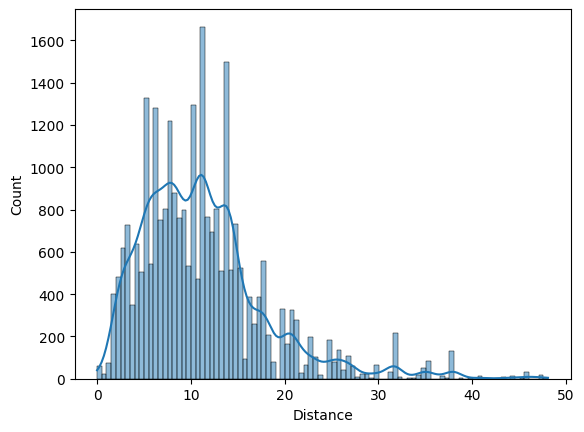

In [89]:
sns.histplot(df,x='Distance',kde=True); # distribution is skewed towards right

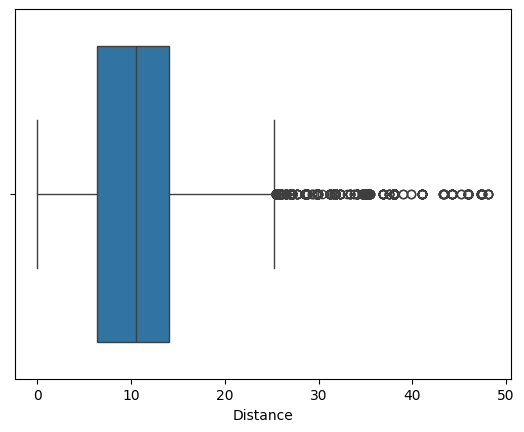

In [90]:
sns.boxplot(df,x='Distance');

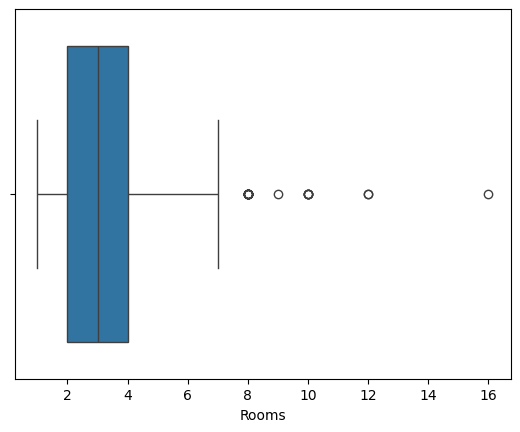

In [91]:
sns.boxplot(df,x='Rooms');

In [92]:
df.loc[df['Rooms']>7].shape # to know the number of houses which has more than 7 rooms as outliers. Since there could be multiple data ponints in one representative point in outliers.

(23, 16)

#4) Bivariate Analysis

In [93]:
df['Total_Space']= df['Rooms']+ df['Bedroom'] + df['Bathroom']+ df['Car']
df.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total_Space
0,Airport West,3,t,Nelson,2016-09-03,13.500,3042.000,3.000,2.000,1.000,303.000,225.000,2016.000,Western Metropolitan,3464,840000,9.000
1,Albert Park,2,h,hockingstuart,2016-09-03,3.300,3206.000,2.000,1.000,0.000,120.000,82.000,1900.000,Southern Metropolitan,3280,1275000,5.000
2,Albert Park,2,h,Thomson,2016-09-03,3.300,3206.000,2.000,1.000,0.000,159.000,NaN,NaN,Southern Metropolitan,3280,1455000,5.000
3,Alphington,4,h,Brace,2016-09-03,6.400,3078.000,3.000,2.000,4.000,853.000,263.000,1930.000,Northern Metropolitan,2211,2000000,13.000
4,Alphington,3,h,Jellis,2016-09-03,6.400,3078.000,3.000,2.000,2.000,208.000,NaN,2013.000,Northern Metropolitan,2211,1110000,10.000


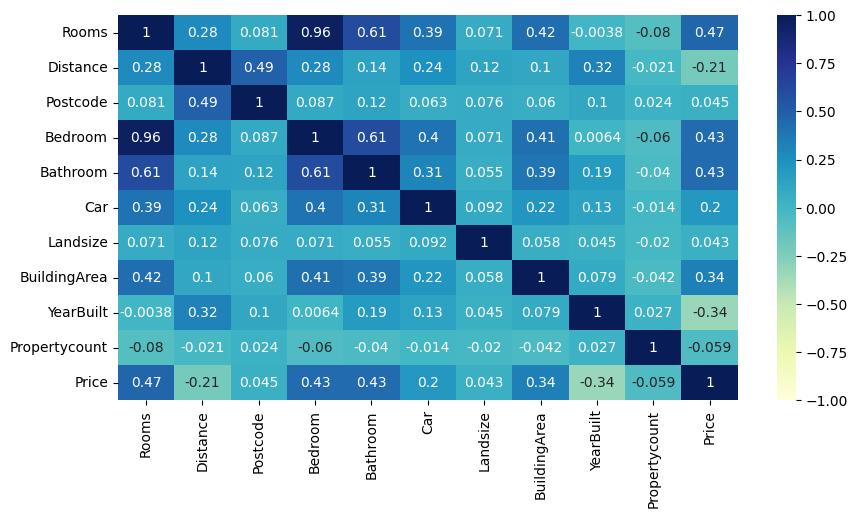

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,5))
sns.heatmap(df[['Rooms','Distance','Postcode','Bedroom','Bathroom','Car','Landsize','BuildingArea','YearBuilt','Propertycount','Price']].corr(),annot=True,cmap='YlGnBu',vmin=-1,vmax=1);

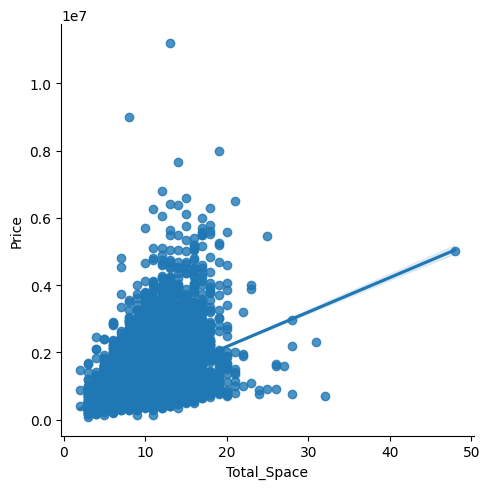

In [95]:
sns.lmplot(df,x='Total_Space',y='Price');

In [96]:
df[['Total_Space','Price']].corr() # to find the correlation between two categorical columns

,Total_Space,Price
Total_Space,1.000,0.458
Price,0.458,1.000


<ipython-input-97-73d497e30173>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(df,x='Distance',y='Price',ci=False);


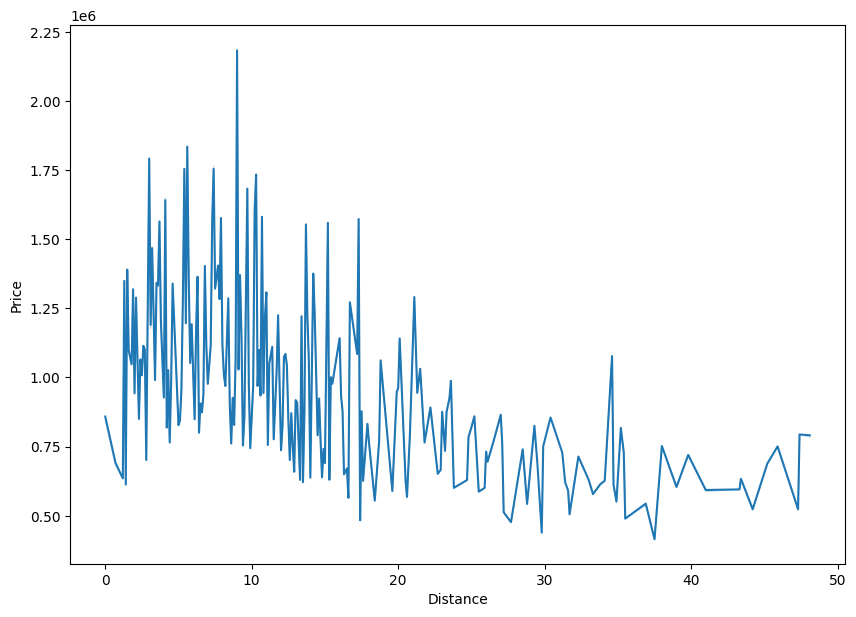

In [97]:
plt.figure(figsize=(10,7));
sns.lineplot(df,x='Distance',y='Price',ci=False);

In [98]:
df['Distance_bin']=pd.cut(df['Distance'],bins=[0,15,30,50],labels=['Nearby','Moderately close','Far'],right=False) # creating bins in datasets
df.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total_Space,Distance_bin
0,Airport West,3,t,Nelson,2016-09-03,13.500,3042.000,3.000,2.000,1.000,303.000,225.000,2016.000,Western Metropolitan,3464,840000,9.000,Nearby
1,Albert Park,2,h,hockingstuart,2016-09-03,3.300,3206.000,2.000,1.000,0.000,120.000,82.000,1900.000,Southern Metropolitan,3280,1275000,5.000,Nearby
2,Albert Park,2,h,Thomson,2016-09-03,3.300,3206.000,2.000,1.000,0.000,159.000,NaN,NaN,Southern Metropolitan,3280,1455000,5.000,Nearby
3,Alphington,4,h,Brace,2016-09-03,6.400,3078.000,3.000,2.000,4.000,853.000,263.000,1930.000,Northern Metropolitan,2211,2000000,13.000,Nearby
4,Alphington,3,h,Jellis,2016-09-03,6.400,3078.000,3.000,2.000,2.000,208.000,NaN,2013.000,Northern Metropolitan,2211,1110000,10.000,Nearby


pd.cut() command creates bins

Syntax-
pd.cut(x,bins,labels,right=False)

x= column to be bins

bin = number of bins to create or range of bins

labels= specify the label of the bins

right=False = It excludes the rightmost edge of interval

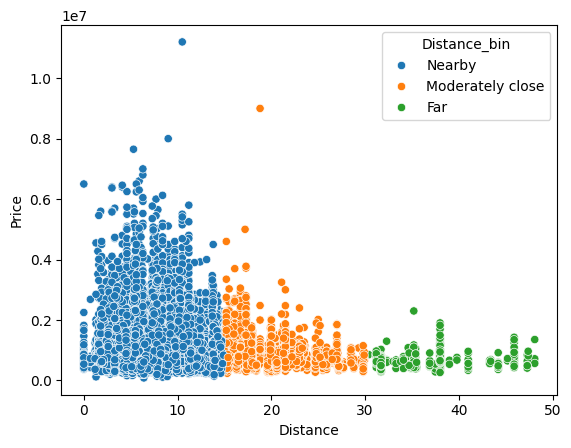

In [99]:
sns.scatterplot(df,x='Distance',y='Price',hue='Distance_bin');

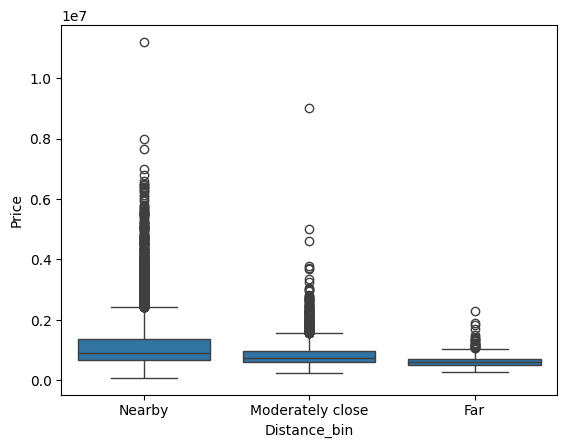

In [100]:
sns.boxplot(df,x='Distance_bin',y='Price');

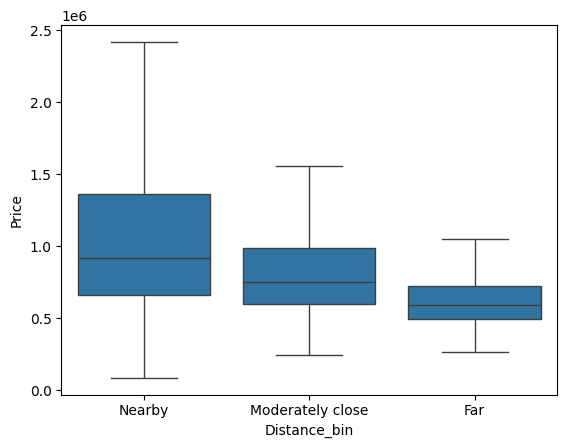

In [101]:
sns.boxplot(df,x='Distance_bin',y='Price',showfliers=False); # to doesn't display the outliers while displaying plots and doesn't remove the outlier in main data

In [102]:
df[['YearBuilt','Price']].corr()

,YearBuilt,Price
YearBuilt,1.000,-0.340
Price,-0.340,1.000


In [103]:
year_at_sale=df['Date'].dt.year # this will create a new varaiable year_at_sale but not new column in data table
year_at_sale

,Date
0,2016
1,2016
2,2016
3,2016
4,2016
...,...
27098,2017
27099,2017
27100,2017
27101,2017


In [104]:
np.max(year_at_sale)

2018

In [105]:
df['Property age'] = year_at_sale - df['YearBuilt'] # this will cretae a new column in data table
df

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total_Space,Distance_bin,Property age
0,Airport West,3,t,Nelson,2016-09-03,13.500,3042.000,3.000,2.000,1.000,303.000,225.000,2016.000,Western Metropolitan,3464,840000,9.000,Nearby,0.000
1,Albert Park,2,h,hockingstuart,2016-09-03,3.300,3206.000,2.000,1.000,0.000,120.000,82.000,1900.000,Southern Metropolitan,3280,1275000,5.000,Nearby,116.000
2,Albert Park,2,h,Thomson,2016-09-03,3.300,3206.000,2.000,1.000,0.000,159.000,NaN,NaN,Southern Metropolitan,3280,1455000,5.000,Nearby,NaN
3,Alphington,4,h,Brace,2016-09-03,6.400,3078.000,3.000,2.000,4.000,853.000,263.000,1930.000,Northern Metropolitan,2211,2000000,13.000,Nearby,86.000
4,Alphington,3,h,Jellis,2016-09-03,6.400,3078.000,3.000,2.000,2.000,208.000,NaN,2013.000,Northern Metropolitan,2211,1110000,10.000,Nearby,3.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27098,Noble Park,3,h,C21,2017-09-30,22.700,3174.000,3.000,1.000,6.000,569.000,130.000,1959.000,South-Eastern Metropolitan,11806,627500,13.000,Moderately close,58.000
27099,Reservoir,3,u,RW,2017-09-30,12.000,3073.000,3.000,1.000,1.000,NaN,105.000,1990.000,Northern Metropolitan,21650,475000,8.000,Nearby,27.000
27100,Roxburgh Park,4,h,Raine,2017-09-30,20.600,3064.000,4.000,2.000,2.000,NaN,225.000,1995.000,Northern Metropolitan,5833,591000,12.000,Moderately close,22.000
27101,Springvale South,3,h,Harcourts,2017-09-30,22.200,3172.000,3.000,2.000,1.000,544.000,NaN,NaN,South-Eastern Metropolitan,4054,780500,9.000,Moderately close,NaN


In [106]:
df[df['Property age']<0] # there are 7 properties whoes age is in negative (less than zero), this is a mistake!

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total_Space,Distance_bin,Property age
285,Avondale Heights,3,t,Nelson,2016-12-03,10.500,3034.000,3.000,3.000,1.000,557.000,181.000,2017.000,Western Metropolitan,4502,851000,10.000,Nearby,-1.000
13854,Bentleigh,3,h,Woodards,2018-03-17,11.400,3204.000,3.000,1.000,4.000,635.000,242.000,2019.000,Southern Metropolitan,6795,1100000,11.000,Nearby,-1.000
15232,Reservoir,4,h,Barry,2016-09-17,11.200,3073.000,3.000,2.000,2.000,834.000,129.000,2017.000,Northern Metropolitan,21650,767500,11.000,Nearby,-1.000
19463,Keilor East,3,h,Nelson,2016-04-23,12.800,3033.000,3.000,2.000,1.000,630.000,126.000,2017.000,Western Metropolitan,5629,825000,9.000,Nearby,-1.000
21326,Brighton East,2,h,Buxton,2016-09-24,10.700,3187.000,4.000,3.000,2.000,302.000,250.000,2018.000,Southern Metropolitan,6938,1310000,11.000,Nearby,-2.000
24897,Newport,3,h,Jas,2016-05-28,8.400,3015.000,4.000,2.000,1.000,487.000,190.000,2017.000,Western Metropolitan,5498,945000,10.000,Nearby,-1.000
27069,Heidelberg,3,h,Miles,2016-07-30,10.600,3084.000,5.000,3.000,2.000,649.000,357.000,2017.000,Eastern Metropolitan,2890,1030000,13.000,Nearby,-1.000


<ipython-input-107-fae393ce59e0>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(df,x='Property age',y='Price',ci=False);


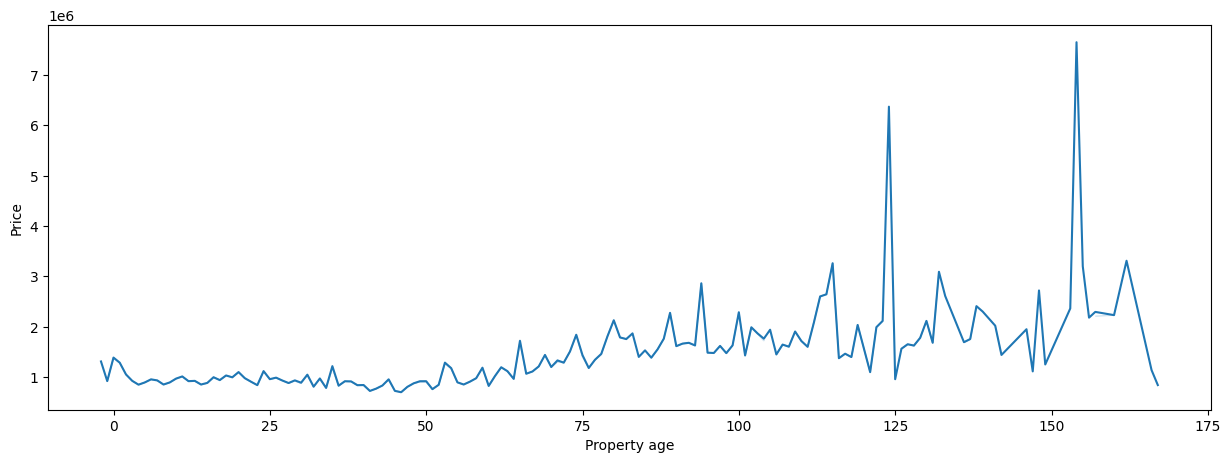

In [107]:
plt.figure(figsize=(15,5)) # in figsize first is x=axis and second is y axis
sns.lineplot(df,x='Property age',y='Price',ci=False);

#5) Missing Value Treatment
Missing values can be treated using the cross-referenced data or can be droped off or can be imputed.

Imputing can be performed using measures of central tendency.

Mean- Missing data can be imputed using mean, however mean is impacted with presence of outliers. So we should avoid using mean in presence of more outliers.

Median- Missing data can be imputed using median. Its a prefered choice when there are more outliers.

Mode- Missing data can be imputed using mode (most common occurance value) for categorical data. Its a prefered choice when there are more outliers.

In [108]:
# to calculate sum of missing values in each column
# shape[0] will give the number of rows in datasets
pd.DataFrame({'Count':df.isnull().sum()[df.isnull().sum()>0],'Percentage':(df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100})

,Count,Percentage
Distance,1,0.004
Postcode,1,0.004
Bedroom,6425,23.706
Bathroom,6431,23.728
Car,6806,25.112
Landsize,9230,34.055
BuildingArea,16574,61.152
YearBuilt,15118,55.780
Total_Space,6806,25.112
Distance_bin,1,0.004


In [109]:
# for distance column one value is missing so to extract that particular row we use .loc function
df.loc[df['Distance'].isnull()==True]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total_Space,Distance_bin,Property age
9590,Fawkner Lot,3,h,Brad,2018-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,962,616000,NaN,NaN,NaN


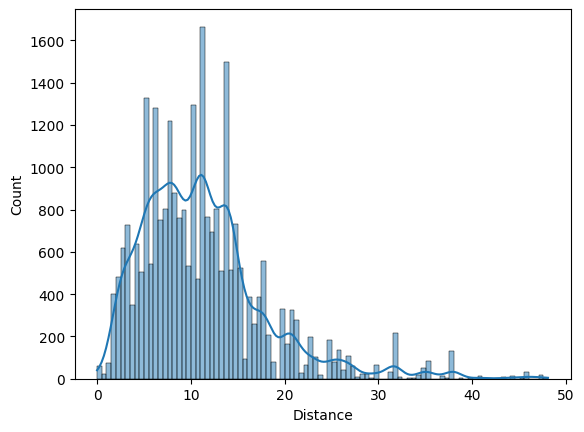

In [110]:
sns.histplot(df,x='Distance',kde=True);
# bimodal right skewed curve

In [111]:
# treating missing values example in distance comun there is one row which has missing values so lets deep dive into data
df.loc[df['Distance'].isnull()==True]
# this row has lots of missing values, we can drop this row as we don't know many things about it. This could be random missing which can happen due lack of data entry or may have any pattern of missing.
# if there is random missing in data values then we can refer to get back to know the original data from reliable data source.

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total_Space,Distance_bin,Property age
9590,Fawkner Lot,3,h,Brad,2018-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,962,616000,NaN,NaN,NaN


In [112]:
# if there is a pattern about missing data then lets learn more about it. We can chcek if there are more such rows by comparing other rows with Fawkner Lot
df.loc[df['Suburb']=='Fawkner Lot']
# so there is only one row which has lots of missing data that is 'Fawkner Lot' row no-9590

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total_Space,Distance_bin,Property age
9590,Fawkner Lot,3,h,Brad,2018-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,962,616000,NaN,NaN,NaN


In [113]:
# we can remove the Fawkner Lot row as it has multiple missing data entries
# we can add the index value of the row which we want to drop inside square bracket in df.drop() function
df= df.drop(9590).reset_index(drop=True)

In [114]:
pd.DataFrame({'Count':df.isnull().sum()[df.isnull().sum()>0],'Percentage':(df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100})

,Count,Percentage
Bedroom,6424,23.703
Bathroom,6430,23.725
Car,6805,25.109
Landsize,9229,34.053
BuildingArea,16573,61.150
YearBuilt,15117,55.778
Total_Space,6805,25.109
Property age,15117,55.778


In [115]:
df.loc[df['Bedroom'].isnull()==True]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total_Space,Distance_bin,Property age
8,Altona North,4,h,hockingstuart,2016-09-03,11.100,3025.000,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,5132,857500,NaN,Nearby,NaN
12,Ashburton,2,h,Marshall,2016-09-03,11.000,3147.000,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,3052,1820000,NaN,Nearby,NaN
14,Avondale Heights,4,h,Jellis,2016-09-03,10.500,3034.000,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,4502,1310000,NaN,Nearby,NaN
25,Balwyn North,4,u,hockingstuart,2016-09-03,9.200,3104.000,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,7809,1450000,NaN,Nearby,NaN
26,Balwyn North,2,h,Fletchers,2016-09-03,9.200,3104.000,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,7809,1305000,NaN,Nearby,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27088,Footscray,2,u,McGrath,2017-09-30,5.100,3011.000,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,7570,455500,NaN,Nearby,NaN
27089,Forest Hill,2,h,Fletchers,2017-09-30,15.400,3131.000,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Metropolitan,4385,762000,NaN,Moderately close,NaN
27090,Glen Waverley,3,u,Ray,2017-09-30,16.700,3150.000,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Metropolitan,15321,1100000,NaN,Moderately close,NaN
27093,Kingsbury,2,t,RW,2017-09-30,12.100,3083.000,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,1414,512000,NaN,Nearby,NaN


In [116]:
df.loc[df['Bedroom'].isnull()==True,'Bathroom'].value_counts(dropna=False)

,count
Bathroom,
NaN,6424


In [117]:
df.loc[df['Bedroom'].isnull()==True,'Car'].value_counts(dropna=False)

,count
Car,
NaN,6424


In [118]:
df.loc[df['Bedroom'].isnull()==True,'Landsize'].value_counts(dropna=False)

,count
Landsize,
NaN,6418
594.000,1
446.000,1
338.000,1
250.000,1
549.000,1
239.000,1


In [119]:
df.loc[df['Bedroom'].isnull()==True,'BuildingArea'].value_counts(dropna=False)

,count
BuildingArea,
NaN,6424


In [120]:
df.loc[df['Bedroom'].isnull()==True,'YearBuilt'].value_counts(dropna=False)

,count
YearBuilt,
NaN,6424


In [121]:
df.loc[df['Bedroom'].isnull()==True,'Total_Space'].value_counts(dropna=False)

,count
Total_Space,
NaN,6424


In [123]:
df.loc[df['Bedroom'].isnull()==True,'Property age'].value_counts(dropna=False)

,count
Property age,
NaN,6424


In [124]:
df.loc[df['Bedroom'].isnull()==True,'Suburb'].value_counts(dropna=False)

,count
Suburb,
Reservoir,236
Bentleigh East,144
St Kilda,116
Glenroy,116
Richmond,111
...,...
Cranbourne East,1
Melton West,1
New Gisborne,1


In [125]:
df.loc[df['Bedroom'].isnull()==True,'Regionname'].value_counts(dropna=False)

,count
Regionname,
Southern Metropolitan,2197
Northern Metropolitan,1912
Western Metropolitan,1212
Eastern Metropolitan,728
South-Eastern Metropolitan,317
Eastern Victoria,26
Northern Victoria,25
Western Victoria,7


In [126]:
# treating missing values of bedroom, bathroom and car columns.
# we can use .groupby() function to group bedroom, bathroom, number of car parking spaces as per either region name or house type
df.groupby(['Regionname','Type'])[['Bedroom','Bathroom','Car']].mean()

Bedroom  Bathroom   Car
Regionname                 Type                         
Eastern Metropolitan       h       3.552     1.807 1.946
                           t       3.032     1.853 1.673
                           u       2.357     1.263 1.290
Eastern Victoria           h       3.560     1.881 2.098
                           u       2.667     1.000 1.333
Northern Metropolitan      h       3.106     1.468 1.685
                           t       2.567     1.620 1.362
                           u       1.878     1.160 1.093
Northern Victoria          h       3.496     1.892 2.146
                           u       3.000     2.000 2.000
South-Eastern Metropolitan h       3.476     1.713 2.094
                           t       2.887     1.849 1.679
                           u       2.260     1.205 1.342
Southern Metropolitan      h       3.383     1.840 1.883
                           t       3.024     2.012 1.780
                           u       1.939     1.191 1.135
Western Metropolitan       h       3.244     1.576 1.907
                           t       2.880     1.851 1.538
                           u       2.106     1.192 1.144
Western Victoria           h       3.379     1.448 2.060

In [133]:
# imputing the missing values in Bedroom, Bathroom and Car column using fillna() and transform function
df['Bedroom'] = df['Bedroom'].fillna(value=df.groupby(['Regionname','Type'])['Bedroom'].transform('mean'))

In [134]:
# imputing the missing values in Bedroom, Bathroom and Car column using fillna() and transform function
df['Bathroom'] = df['Bathroom'].fillna(value=df.groupby(['Regionname','Type'])['Bedroom'].transform('mean'))

In [135]:
df['Car'] = df['Car'].fillna(value=df.groupby(['Regionname','Type'])['Car'].transform('mean'))
df

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total_Space,Distance_bin,Property age
0,Airport West,3,t,Nelson,2016-09-03,13.500,3042.000,3,2.000,1.000,303.000,225.000,2016.000,Western Metropolitan,3464,840000,9.000,Nearby,0.000
1,Albert Park,2,h,hockingstuart,2016-09-03,3.300,3206.000,2,1.000,0.000,120.000,82.000,1900.000,Southern Metropolitan,3280,1275000,5.000,Nearby,116.000
2,Albert Park,2,h,Thomson,2016-09-03,3.300,3206.000,2,1.000,0.000,159.000,NaN,NaN,Southern Metropolitan,3280,1455000,5.000,Nearby,NaN
3,Alphington,4,h,Brace,2016-09-03,6.400,3078.000,3,2.000,4.000,853.000,263.000,1930.000,Northern Metropolitan,2211,2000000,13.000,Nearby,86.000
4,Alphington,3,h,Jellis,2016-09-03,6.400,3078.000,3,2.000,2.000,208.000,NaN,2013.000,Northern Metropolitan,2211,1110000,10.000,Nearby,3.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27097,Noble Park,3,h,C21,2017-09-30,22.700,3174.000,3,1.000,6.000,569.000,130.000,1959.000,South-Eastern Metropolitan,11806,627500,13.000,Moderately close,58.000
27098,Reservoir,3,u,RW,2017-09-30,12.000,3073.000,3,1.000,1.000,NaN,105.000,1990.000,Northern Metropolitan,21650,475000,8.000,Nearby,27.000
27099,Roxburgh Park,4,h,Raine,2017-09-30,20.600,3064.000,4,2.000,2.000,NaN,225.000,1995.000,Northern Metropolitan,5833,591000,12.000,Moderately close,22.000
27100,Springvale South,3,h,Harcourts,2017-09-30,22.200,3172.000,3,2.000,1.000,544.000,NaN,NaN,South-Eastern Metropolitan,4054,780500,9.000,Moderately close,NaN


In [136]:
pd.DataFrame({'Count':df.isnull().sum()[df.isnull().sum()>0],'Percentage':(df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100})

,Count,Percentage
Landsize,9229,34.053
BuildingArea,16573,61.150
YearBuilt,15117,55.778
Total_Space,6805,25.109
Property age,15117,55.778


In [137]:
# converting the imputed values from decimals to integer
df['Bedroom']= df['Bedroom'].astype(int)
df['Bathroom']= df['Bathroom'].astype(int)
df['Car'] = df['Car'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27102 entries, 0 to 27101
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27102 non-null  object        
 1   Rooms          27102 non-null  int64         
 2   Type           27102 non-null  object        
 3   SellerG        27102 non-null  object        
 4   Date           27102 non-null  datetime64[ns]
 5   Distance       27102 non-null  float64       
 6   Postcode       27102 non-null  float64       
 7   Bedroom        27102 non-null  int64         
 8   Bathroom       27102 non-null  int64         
 9   Car            27102 non-null  int64         
 10  Landsize       17873 non-null  float64       
 11  BuildingArea   10529 non-null  float64       
 12  YearBuilt      11985 non-null  float64       
 13  Regionname     27102 non-null  object        
 14  Propertycount  27102 non-null  int64         
 15  Price          2710

In [138]:
# since the Total_Space column values are updated so we need to drop the old Total_Space column and then update new Total_Space column in the data table
df.drop('Total_Space',axis=1,inplace=True)
# creating new Total Space column
df['Total Space']= df['Rooms']+df['Bedroom']+df['Bathroom']+df['Car']
df

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Distance_bin,Property age,Total Space
0,Airport West,3,t,Nelson,2016-09-03,13.500,3042.000,3,2,1,303.000,225.000,2016.000,Western Metropolitan,3464,840000,Nearby,0.000,9
1,Albert Park,2,h,hockingstuart,2016-09-03,3.300,3206.000,2,1,0,120.000,82.000,1900.000,Southern Metropolitan,3280,1275000,Nearby,116.000,5
2,Albert Park,2,h,Thomson,2016-09-03,3.300,3206.000,2,1,0,159.000,NaN,NaN,Southern Metropolitan,3280,1455000,Nearby,NaN,5
3,Alphington,4,h,Brace,2016-09-03,6.400,3078.000,3,2,4,853.000,263.000,1930.000,Northern Metropolitan,2211,2000000,Nearby,86.000,13
4,Alphington,3,h,Jellis,2016-09-03,6.400,3078.000,3,2,2,208.000,NaN,2013.000,Northern Metropolitan,2211,1110000,Nearby,3.000,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27097,Noble Park,3,h,C21,2017-09-30,22.700,3174.000,3,1,6,569.000,130.000,1959.000,South-Eastern Metropolitan,11806,627500,Moderately close,58.000,13
27098,Reservoir,3,u,RW,2017-09-30,12.000,3073.000,3,1,1,NaN,105.000,1990.000,Northern Metropolitan,21650,475000,Nearby,27.000,8
27099,Roxburgh Park,4,h,Raine,2017-09-30,20.600,3064.000,4,2,2,NaN,225.000,1995.000,Northern Metropolitan,5833,591000,Moderately close,22.000,12
27100,Springvale South,3,h,Harcourts,2017-09-30,22.200,3172.000,3,2,1,544.000,NaN,NaN,South-Eastern Metropolitan,4054,780500,Moderately close,NaN,9


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27102 entries, 0 to 27101
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27102 non-null  object        
 1   Rooms          27102 non-null  int64         
 2   Type           27102 non-null  object        
 3   SellerG        27102 non-null  object        
 4   Date           27102 non-null  datetime64[ns]
 5   Distance       27102 non-null  float64       
 6   Postcode       27102 non-null  float64       
 7   Bedroom        27102 non-null  int64         
 8   Bathroom       27102 non-null  int64         
 9   Car            27102 non-null  int64         
 10  Landsize       17873 non-null  float64       
 11  BuildingArea   10529 non-null  float64       
 12  YearBuilt      11985 non-null  float64       
 13  Regionname     27102 non-null  object        
 14  Propertycount  27102 non-null  int64         
 15  Price          2710

In [140]:
df['Total Space']=df['Total Space'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27102 entries, 0 to 27101
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27102 non-null  object        
 1   Rooms          27102 non-null  int64         
 2   Type           27102 non-null  object        
 3   SellerG        27102 non-null  object        
 4   Date           27102 non-null  datetime64[ns]
 5   Distance       27102 non-null  float64       
 6   Postcode       27102 non-null  float64       
 7   Bedroom        27102 non-null  int64         
 8   Bathroom       27102 non-null  int64         
 9   Car            27102 non-null  int64         
 10  Landsize       17873 non-null  float64       
 11  BuildingArea   10529 non-null  float64       
 12  YearBuilt      11985 non-null  float64       
 13  Regionname     27102 non-null  object        
 14  Propertycount  27102 non-null  int64         
 15  Price          2710

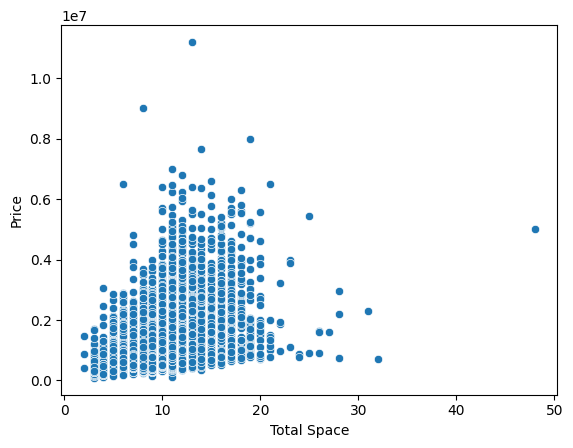

In [141]:
sns.scatterplot(df,x='Total Space',y='Price');
# here data distribution in scatter plot has not changed much which indicates that data transformation doesnt change the data distribution which is a good indicator.

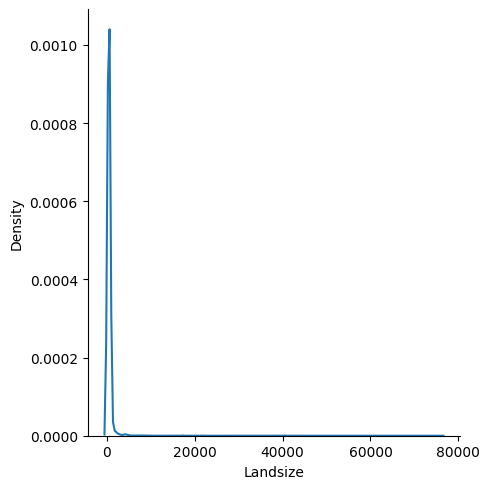

In [142]:
# Missing treatment for Landsize
sns.displot(df,x='Landsize',kind='kde');
# here data is heavily skewed towards the right which could be because of many outliers.

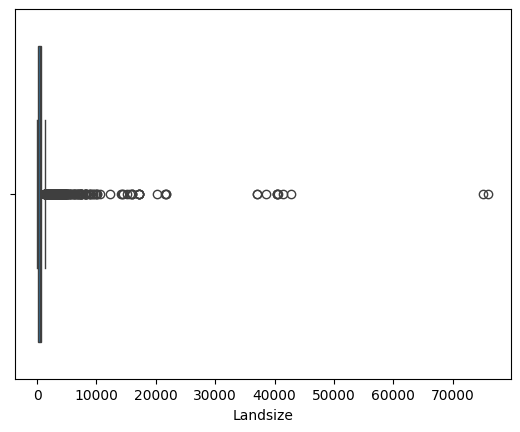

In [143]:
# we can check the numbers of outliers using boxplot
sns.boxplot(df,x='Landsize');

In [144]:
# as there are many outliers and data is heavily skewed towards right, we should use median to replace the missing values instead of mean. Mean is impacted by outliers.
# since Landsize is a numerical data so we should use median instead of mode to impute the missing values
df.groupby(['Regionname','Type'])[['Landsize']].median()

Landsize
Regionname                 Type          
Eastern Metropolitan       h      693.500
                           t      236.000
                           u      208.000
Eastern Victoria           h      840.000
                           u      230.000
Northern Metropolitan      h      482.000
                           t      145.000
                           u       50.000
Northern Victoria          h      737.500
                           u      315.000
South-Eastern Metropolitan h      632.000
                           t      248.000
                           u      210.000
Southern Metropolitan      h      593.000
                           t      267.000
                           u       50.000
Western Metropolitan       h      537.000
                           t      200.000
                           u       80.000
Western Victoria           h      603.000

In [145]:
df['Landsize']=df['Landsize'].fillna(value=df.groupby(['Regionname','Type'])['Landsize'].transform('median'))
df

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Distance_bin,Property age,Total Space
0,Airport West,3,t,Nelson,2016-09-03,13.500,3042.000,3,2,1,303.000,225.000,2016.000,Western Metropolitan,3464,840000,Nearby,0.000,9
1,Albert Park,2,h,hockingstuart,2016-09-03,3.300,3206.000,2,1,0,120.000,82.000,1900.000,Southern Metropolitan,3280,1275000,Nearby,116.000,5
2,Albert Park,2,h,Thomson,2016-09-03,3.300,3206.000,2,1,0,159.000,NaN,NaN,Southern Metropolitan,3280,1455000,Nearby,NaN,5
3,Alphington,4,h,Brace,2016-09-03,6.400,3078.000,3,2,4,853.000,263.000,1930.000,Northern Metropolitan,2211,2000000,Nearby,86.000,13
4,Alphington,3,h,Jellis,2016-09-03,6.400,3078.000,3,2,2,208.000,NaN,2013.000,Northern Metropolitan,2211,1110000,Nearby,3.000,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27097,Noble Park,3,h,C21,2017-09-30,22.700,3174.000,3,1,6,569.000,130.000,1959.000,South-Eastern Metropolitan,11806,627500,Moderately close,58.000,13
27098,Reservoir,3,u,RW,2017-09-30,12.000,3073.000,3,1,1,50.000,105.000,1990.000,Northern Metropolitan,21650,475000,Nearby,27.000,8
27099,Roxburgh Park,4,h,Raine,2017-09-30,20.600,3064.000,4,2,2,482.000,225.000,1995.000,Northern Metropolitan,5833,591000,Moderately close,22.000,12
27100,Springvale South,3,h,Harcourts,2017-09-30,22.200,3172.000,3,2,1,544.000,NaN,NaN,South-Eastern Metropolitan,4054,780500,Moderately close,NaN,9


In [146]:
pd.DataFrame({'Count':df.isnull().sum()[df.isnull().sum()>0],'Percentage':(df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100})
# BuildingArea and YearBuilt has more than 50% data missing in such case its not good idea to do imputation. We should not do imputation if missing data is more than 50%.
# Property age is derived from YearBuilt so we do not impute that columnn as well.
# we have two options-
# 1) To drop the column of BuildingArea, YearBuilt and Property age which could lead to loss of data.
# 2) We can do the analysis with non-null data, this will allow us to preserve the data which is not null and doesn't hamper data analysis nor lead to biasness.

,Count,Percentage
BuildingArea,16573,61.150
YearBuilt,15117,55.778
Property age,15117,55.778


In [147]:
# we proceed with option-2
new_df=df[df['BuildingArea'].notnull()]
new_df

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Distance_bin,Property age,Total Space
0,Airport West,3,t,Nelson,2016-09-03,13.500,3042.000,3,2,1,303.000,225.000,2016.000,Western Metropolitan,3464,840000,Nearby,0.000,9
1,Albert Park,2,h,hockingstuart,2016-09-03,3.300,3206.000,2,1,0,120.000,82.000,1900.000,Southern Metropolitan,3280,1275000,Nearby,116.000,5
3,Alphington,4,h,Brace,2016-09-03,6.400,3078.000,3,2,4,853.000,263.000,1930.000,Northern Metropolitan,2211,2000000,Nearby,86.000,13
5,Altona,3,h,Greg,2016-09-03,13.800,3018.000,3,2,1,352.000,242.000,2015.000,Western Metropolitan,5301,520000,Nearby,1.000,9
6,Altona North,5,h,FN,2016-09-03,11.100,3025.000,5,3,6,592.000,251.000,1965.000,Western Metropolitan,5132,1085000,Nearby,51.000,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27094,Maidstone,2,h,Biggin,2017-09-30,6.400,3012.000,2,1,1,300.000,108.000,1950.000,Western Metropolitan,3873,611500,Nearby,67.000,6
27097,Noble Park,3,h,C21,2017-09-30,22.700,3174.000,3,1,6,569.000,130.000,1959.000,South-Eastern Metropolitan,11806,627500,Moderately close,58.000,13
27098,Reservoir,3,u,RW,2017-09-30,12.000,3073.000,3,1,1,50.000,105.000,1990.000,Northern Metropolitan,21650,475000,Nearby,27.000,8
27099,Roxburgh Park,4,h,Raine,2017-09-30,20.600,3064.000,4,2,2,482.000,225.000,1995.000,Northern Metropolitan,5833,591000,Moderately close,22.000,12


In [148]:
df_missingvaluetreated = df.drop(['BuildingArea','YearBuilt','Property age'],axis=1)

In [151]:
df_missingvaluetreated.to_csv(r'C:\Users\ASUS\Documents\Great learning- PGP Data Science and Business Analytics\Python for Data Science\Exploratory Data Analysis.csv',index=False)

#6) Outlier Treatment

Treating an outlier is very critical, it depends upon weather an outlier is really import that could impact the data driven story or its abnormality. So treatment of an outlier need domian knowledege and through understanding of data.

Ways to deal with outliers involve-

1. Replacement with null values- We can consider these values as missing data and can replace with NaN.

2. IQR Method- Replace the data points with lower wishkers (Q1-1.5*IQR) or with upper wishkers (Q3+1.5*IQR).

3. We can drop theses data, but we will lose the other relevant data points.

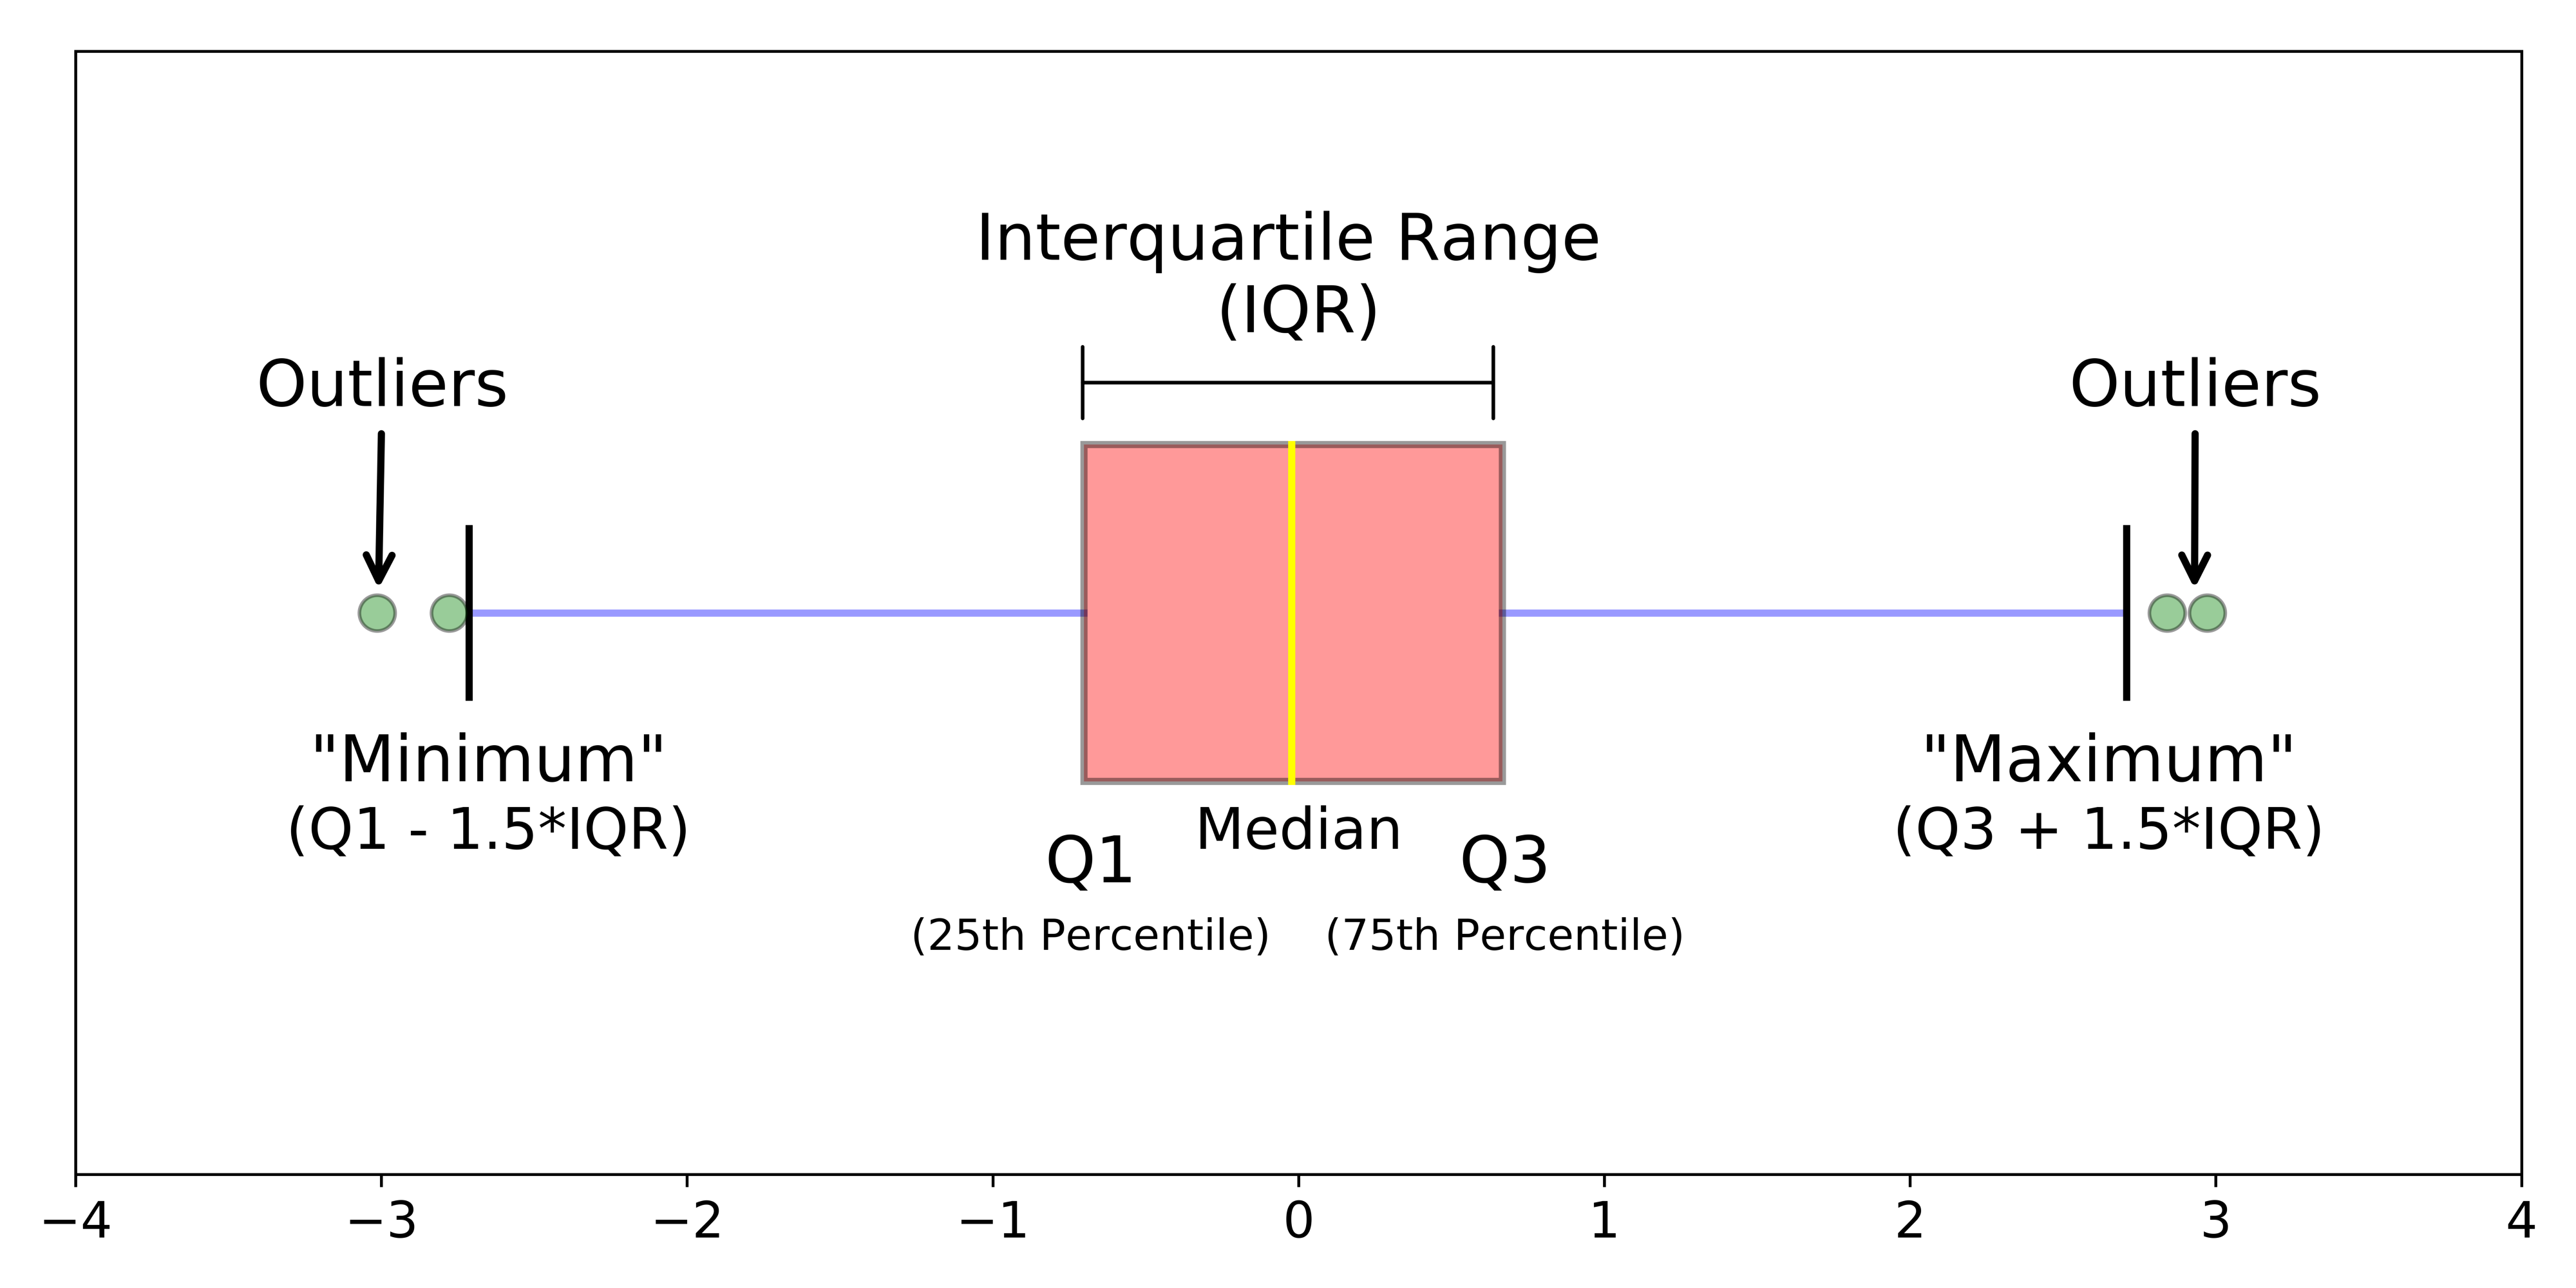

In [154]:
from IPython.display import Image
Image('/content/boxplot.png')

In [156]:
from ast import increment_lineno

In [157]:
path = '/content/Melbourn data missing value treated.csv' # loading and reading data
df= pd.read_csv(path)
df.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,Regionname,Propertycount,Price,Distance_bin,Total Space
0,Airport West,3,t,Nelson,9/3/2016,13.500,3042,3,2,1,303.000,Western Metropolitan,3464,840000,Nearby,9
1,Albert Park,2,h,hockingstuart,9/3/2016,3.300,3206,2,1,0,120.000,Southern Metropolitan,3280,1275000,Nearby,5
2,Albert Park,2,h,Thomson,9/3/2016,3.300,3206,2,1,0,159.000,Southern Metropolitan,3280,1455000,Nearby,5
3,Alphington,4,h,Brace,9/3/2016,6.400,3078,3,2,4,853.000,Northern Metropolitan,2211,2000000,Nearby,13
4,Alphington,3,h,Jellis,9/3/2016,6.400,3078,3,2,2,208.000,Northern Metropolitan,2211,1110000,Nearby,10


In [158]:
df.info() # there is no missing values as all 27102 entries are non-null, but Date is in object data type, so Date need to be converted into date time format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27102 entries, 0 to 27101
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27102 non-null  object 
 1   Rooms          27102 non-null  int64  
 2   Type           27102 non-null  object 
 3   SellerG        27102 non-null  object 
 4   Date           27102 non-null  object 
 5   Distance       27102 non-null  float64
 6   Postcode       27102 non-null  int64  
 7   Bedroom        27102 non-null  int64  
 8   Bathroom       27102 non-null  int64  
 9   Car            27102 non-null  int64  
 10  Landsize       27102 non-null  float64
 11  Regionname     27102 non-null  object 
 12  Propertycount  27102 non-null  int64  
 13  Price          27102 non-null  int64  
 14  Distance_bin   27102 non-null  object 
 15  Total Space    27102 non-null  int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 3.3+ MB


In [159]:
df.shape[0],df.shape[1]

(27102, 16)

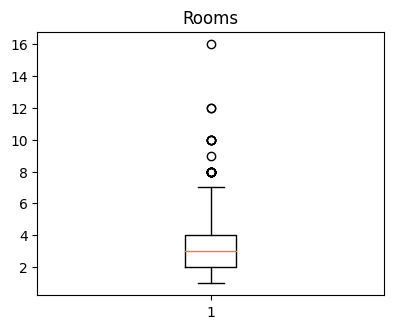

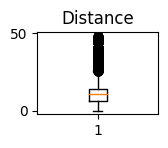

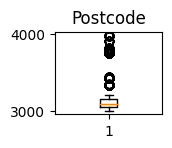

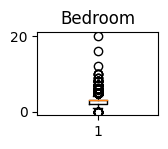

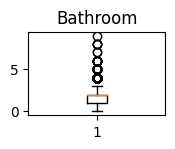

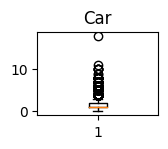

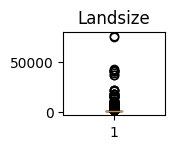

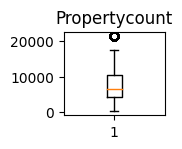

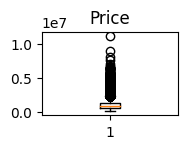

In [160]:
#Outlier detection using box plot
# creating a list of all the numerical columns
numeric_columns=['Rooms','Distance','Postcode','Bedroom','Bathroom','Car','Landsize','Propertycount','Price']
plt.figure(figsize=(15,12))
for i, variable in enumerate(numeric_columns):
  plt.subplot(4,4,i+1)
  plt.boxplot(df[variable],whis=1.5)
  plt.tight_layout()
  plt.title(variable)

  plt.show()

In [161]:
# to find the percentage of each outlier in each column using IQR
Q1= df[numeric_columns].quantile(0.25)
Q3= df[numeric_columns].quantile(0.75)
IQR=Q3-Q1
lower_whisker = Q1 - 1.5*IQR
upper_whisker = Q3 + 1.5*IQR

In [162]:
# percentage of outlier in each column
((df[numeric_columns]< lower_whisker) | (df[numeric_columns]> upper_whisker)).sum()/df.shape[0]*100

,0
Rooms,0.085
Distance,4.343
Postcode,2.911
Bedroom,4.195
Bathroom,0.871
Car,4.306
Landsize,1.742
Propertycount,2.671
Price,4.660


In [163]:
# treating outliers
def treat_outliers(df, col):
  """
  treats outliers in a variable
  col: str, name of the numerical variable
  df: dataframe
  col: name of the column
  """
  Q1= df[col].quantile(0.25)
  Q3= df[col].quantile(0.75)
  IQR = Q3-Q1
  lower_whisker = Q1 - 1.5*IQR
  upper_whisker = Q3 + 1.5*IQR

  df[col]= np.clip(df[col],lower_whisker, upper_whisker) # clip or cap function is used to treat outliers
  return df

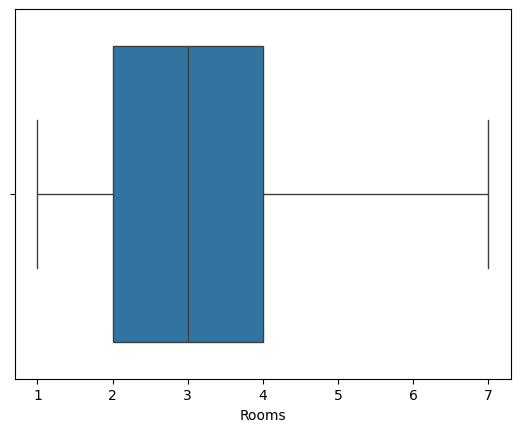

In [164]:
df = treat_outliers(df,'Rooms')
sns.boxplot(df,x='Rooms');

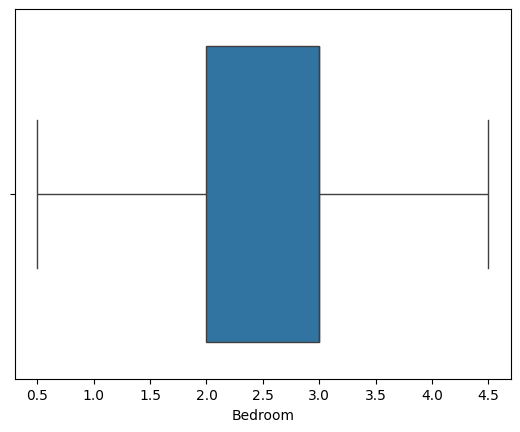

In [165]:
df = treat_outliers(df,'Bedroom')
sns.boxplot(df,x='Bedroom');

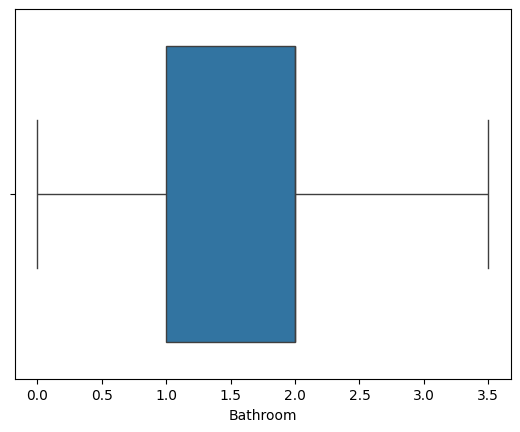

In [166]:
df = treat_outliers(df,'Bathroom')
sns.boxplot(df,x='Bathroom');

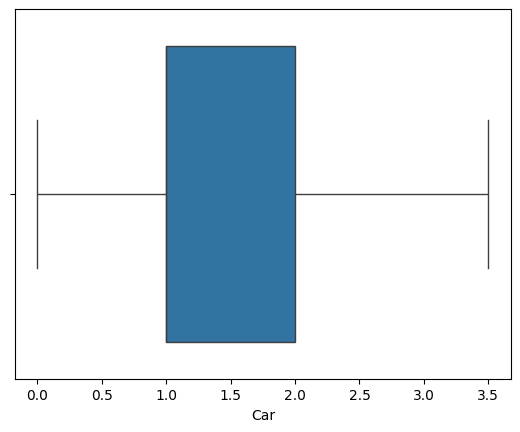

In [167]:
df = treat_outliers(df,'Car')
sns.boxplot(df,x='Car');

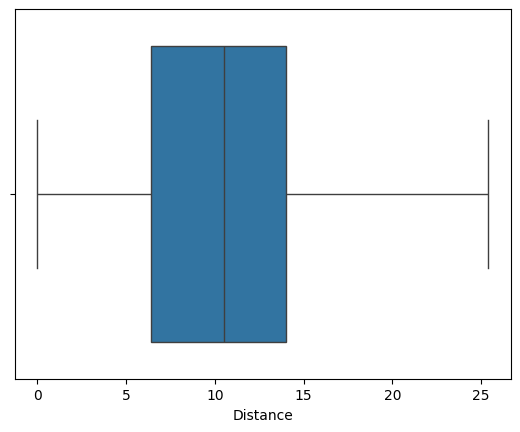

In [168]:
df = treat_outliers(df,'Distance')
sns.boxplot(df,x='Distance');

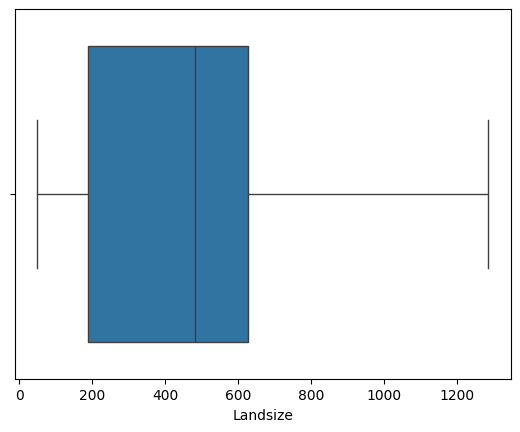

In [169]:
df = treat_outliers(df,'Landsize')
sns.boxplot(df,x='Landsize');

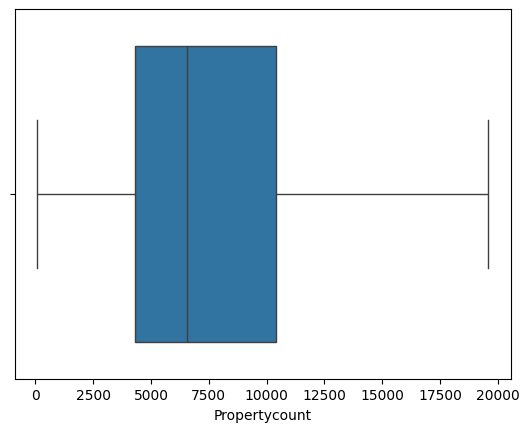

In [170]:
df = treat_outliers(df,'Propertycount')
sns.boxplot(df,x='Propertycount');

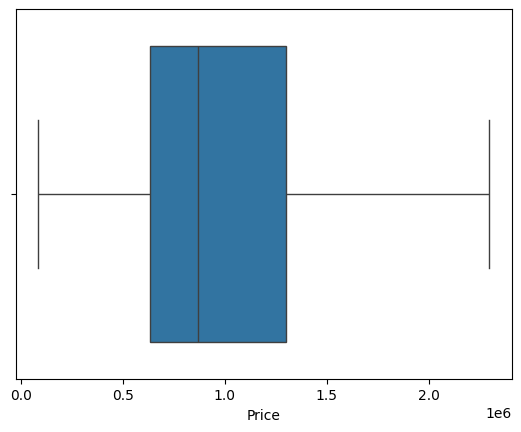

In [171]:
df = treat_outliers(df,'Price')
sns.boxplot(df,x='Price');

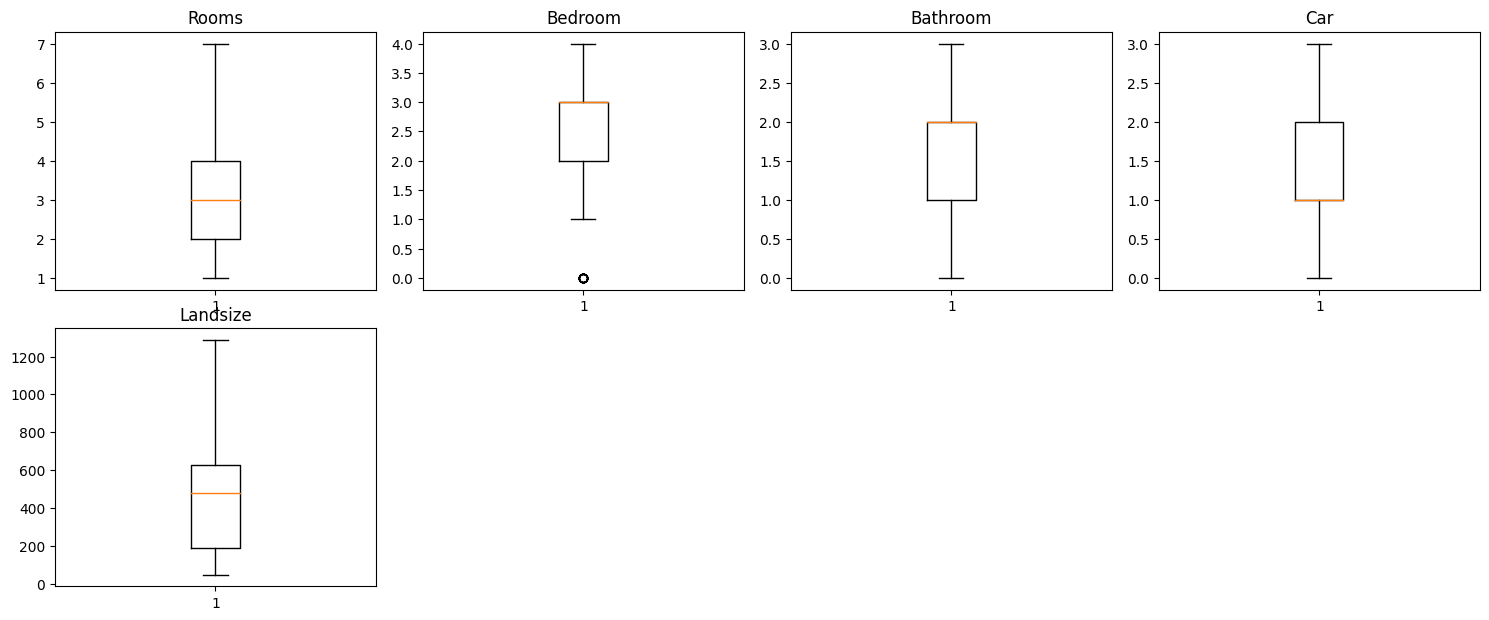

In [176]:
# visuvalizing all the box plot of treated outliers columns in one figure
numeric_columns=['Rooms','Bedroom','Bathroom','Car','Landsize']
plt.figure(figsize=(15,12))
for i, variable in enumerate(numeric_columns):
  plt.subplot(4,4,i+1)
  plt.boxplot(df[variable],whis=1.5)
  plt.tight_layout()
  plt.title(variable)
plt.show()

In [172]:
df['Rooms']= df['Rooms'].astype(int)
df['Bedroom']= df['Bedroom'].astype(int)
df['Bathroom']= df['Bathroom'].astype(int)
df['Car']= df['Car'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27102 entries, 0 to 27101
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27102 non-null  object 
 1   Rooms          27102 non-null  int64  
 2   Type           27102 non-null  object 
 3   SellerG        27102 non-null  object 
 4   Date           27102 non-null  object 
 5   Distance       27102 non-null  float64
 6   Postcode       27102 non-null  int64  
 7   Bedroom        27102 non-null  int64  
 8   Bathroom       27102 non-null  int64  
 9   Car            27102 non-null  int64  
 10  Landsize       27102 non-null  float64
 11  Regionname     27102 non-null  object 
 12  Propertycount  27102 non-null  int64  
 13  Price          27102 non-null  int64  
 14  Distance_bin   27102 non-null  object 
 15  Total Space    27102 non-null  int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 3.3+ MB


In [179]:
# to save the data set
df.to_csv(r'C:\Users\ASUS\Documents\Great learning- PGP Data Science and Business Analytics\Python for Data Science\Exploratory Data Analysis.csv',index=False)